## データの可視化について
## ヒートマップ編



### データの取り込み

ボストン市郊外の地域別住宅価格（https://archive.ics.uci.edu/ml/machine-learning-databases/housing/ ）のデータを取り込む。  
なお本データの目的変数は"MEDV":住宅価格である。

In [2]:
from sklearn.datasets import load_boston
boston = load_boston() # データセットの読み込み

import pandas as pd
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names) 
boston_df["MEDV"]=boston.target

In [2]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


### ヒートマップによるデータの可視化

色の濃淡や色相でデータの密度や値の分布を可視化することができる  
各変数間の相関係数をヒートマップにて可視化する際に用いることが多い  
2020/2/28現在でヒートマップを簡単に描画できるライブラリはseabornのみである。  
またヒートマップを描画する際には、描画したいデータをPivot形式に成型する必要がある。

### データセット内各変数の相関係数をヒートマップで描画する場合  
この場合は各変数の相関係数を'boston_df.corr()'を用いることで簡単にPivot形式に変換することができる。

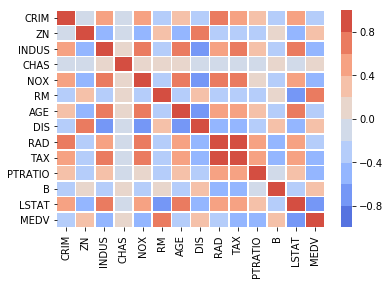

In [6]:
import seaborn as sns

#オプションの詳細は下記【参考】を参照のこと
sns.heatmap(boston_df.corr(),cmap= sns.color_palette('coolwarm', 10), annot=False,fmt='.2f', vmin = -1, vmax = 1, linewidths=.5)

上記例は、各変数間の相関係数をヒートマップで表現したものである

【参考】  
seaborn.heatmapについて(公式):https://seaborn.pydata.org/generated/seaborn.heatmap.html

### データセット内の変数間の傾向をヒートマップで描画する場合

Seabornが提供しているデータセットから'flights'を今回は用いる。  
データセットの中身は、各年月の飛行機の乗客数である。

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df_flights = sns.load_dataset('flights')
df_flights.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


yearとmonthの2軸でpassengersにどのような傾向があるかを見ていく。  
そのためにまず2変数間ので0たをPivot形式に変換する。

In [3]:
df_flights_pivot = pd.pivot_table(data=df_flights, values='passengers', 
                                  columns='year', index='month', aggfunc=np.mean) #x軸に描画したいデータをindexに、y軸に描画したいデータをcolumnに指定する

【参考】  
pandas.pivot_tableについて(公式):https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

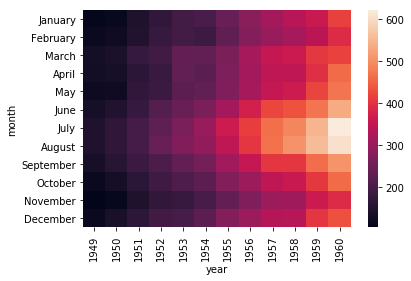

In [4]:
sns.heatmap(df_flights_pivot)

描画する色を変更したい場合、また数値をセルに書き込みたい場合は下記のように描画する

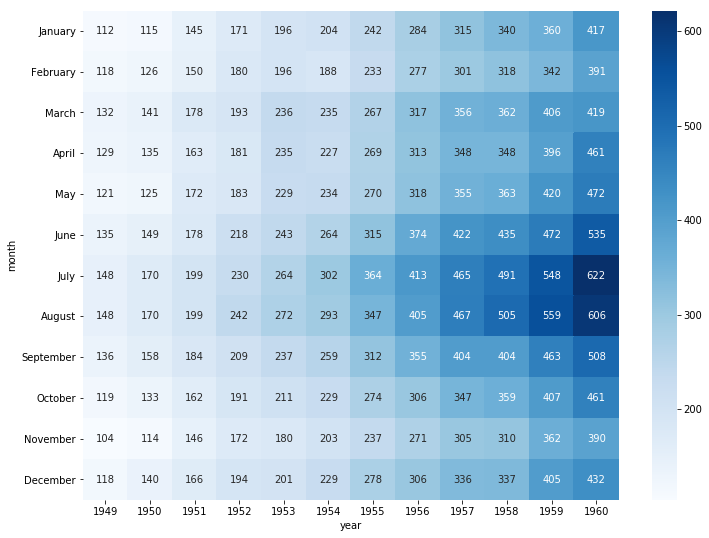

In [6]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_flights_pivot, annot=True, fmt='g', cmap='Blues')  #annotは数値をセルに書き込む引数、fmtは数値の桁の調整、cmapは描画する際の色を指定できる